# Atividade 4

**Objetivo:**  
Desenvolver um programa em Python para *calcular as frequências naturais de vibração e os modos normais (deslocamentos relativos) de uma cadeia atômica finita com 2, 3 e 4 átomos*, incluindo interações com vizinhos mais distantes (segunda vizinhança) no último caso.

 
**Instruções:**
- Cadeia linear com 2 massas:  
    - Modele uma cadeia com duas massas $m_1$ e $m_2$ conectadas por uma mola de constante $k$.
    - Ambas as extremidades são livres (não ligadas a paredes).
    - Estude os efeitos da diferença entre $m_1$ e $m_2$ nas frequências e nos deslocamentos relativos.  

- Extensão para 3 massas:  
    - Conecte três massas em linha com molas entre elas.
    - Varie as massas e analise o comportamento vibracional do sistema.
    - Mantenha as extremidades livres.

- Extensão para 4 massas com inclusão de segunda vizinhança:  
    - Agora, modele uma cadeia com quatro massas $m_1$, $m_2$, $m_3$, $m_4$, conectadas por molas com constante $k$ entre vizinhos imediatos.
    - Adicione molas adicionais conectando pares de massas a duas posições de distância:
        - Entre $m_1$ e $m_3$;
        - Entre $m_2$ e $m_4$.
    - Use uma constante $k’$ para as molas de segunda vizinhança (ex: $k’ = 0.2k, 0.5k,$ etc.).

**Análise:**
- Como a presença de segunda vizinhança altera as frequências naturais
- Quais modos normais são mais afetados por essas interações adicionais.  
 

**Visualizações Recomendadas:**
- Gráficos das frequências naturais para cada configuração;
- Visualização dos modos normais (vetores de deslocamento);
- Comparação entre o caso com e sem interações de segunda vizinhança para 4 átomos.

**Entrega Esperada:**
- Código funcional e bem comentado
- Gráficos claros dos resultados
-Texto explicativo (até 300 palavras) discutindo:
    - O efeito da variação das massas;
    - O impacto da inclusão de segundos vizinhos;
    - A interpretação física das modificações observadas nos modos.

###### 

In [ ]:
!pip install vpython
import matplotlib.pyplot as plt
import numpy as np
from vpython import *
import math as math
from scipy.linalg import eigh

## Casos particulares para 2, 3 e 4 massas com e sem $2^a$ vizinhança

$D_{j,j\pm 1} = \frac{-K_{j,j\pm 1}}{m_j}$, $\hspace{1cm}$   $D_{j, j} = \frac{K_{j, j-1} + K_{j, j+1}}{m_j}$

### D para n = 2

In [87]:
k, m1, m2 = 0.1, 1, 1 #constantes genéricas


D2 = np.array([[k/m1, -k/m1],
              [-k/m2, k/m2]])
valor, vetor = eigh(D2)
print(f"Matriz D: \n{D2} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

Matriz D: 
[[ 0.1 -0.1]
 [-0.1  0.1]] 
 
Frequências: [0.  0.2] 
 
Modos normais: 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


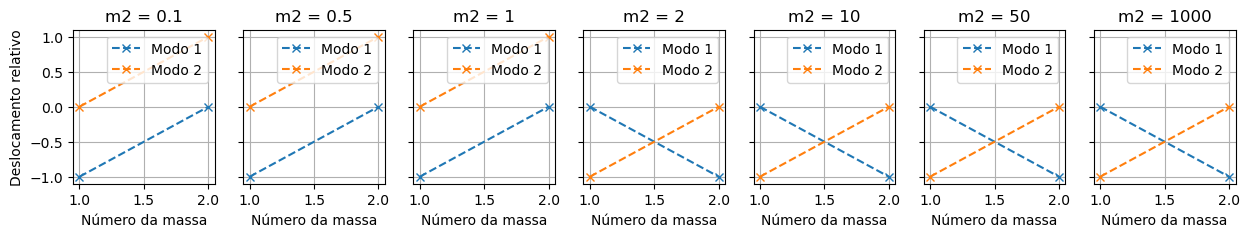

In [72]:
k, m1 = 0.1, 1
m2_var = [0.1, 0.5, 1, 2, 10, 50, 1000]

fig, axs = plt.subplots(1, len(m2_var), figsize=(15, 2), sharey=True)
for idx, m2 in enumerate(m2_var):
    D2 = np.array([[k/m1, 0],
                   [0, k/m2]])
    valor, vetor = eigh(D2)
    for i in range(vetor.shape[1]):
        axs[idx].plot(range(1, vetor.shape[0]+1), vetor[:, i], 'x--', label=f'Modo {i+1}')
    axs[idx].set_title(f"m2 = {m2}")
    axs[idx].set_xlabel('Número da massa')
    axs[idx].grid(True)
    if idx == 0:
        axs[idx].set_ylabel('Deslocamento relativo')
    axs[idx].legend()

<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_9464/1431605586.py:17: SyntaxWarning: invalid escape sequence '\o'
  axs[idx].set_ylabel('$\omega$ (rad/s)')


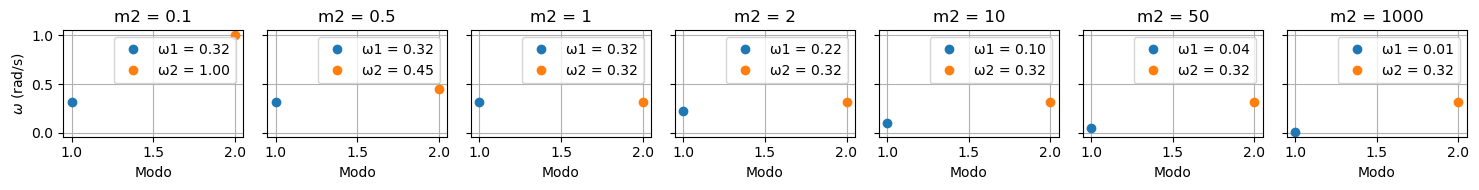

In [80]:
k, m1 = 0.1, 1
m2_var = [0.1, 0.5, 1, 2, 10, 50, 1000]

fig, axs = plt.subplots(1, len(m2_var), figsize=(15, 2), sharey=True)
for idx, m2 in enumerate(m2_var):
    D2 = np.array([[k/m1, 0],
                   [0, k/m2]])
    valor, vetor = eigh(D2)
    freqs = np.sqrt(valor)

    for i, freq in enumerate(freqs):
        axs[idx].plot(i+1, freq, 'o', color=f'C{i}', label=f'ω{i+1} = {freq:.2f}')
    axs[idx].set_title(f"m2 = {m2}")
    axs[idx].set_xlabel('Modo')
    axs[idx].grid(True)
    if idx == 0:
        axs[idx].set_ylabel('$\omega$ (rad/s)')
    axs[idx].legend() 

plt.tight_layout()
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:22: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_9464/1632797500.py:17: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(m2_values, w_var[:, 0], label="$\omega_1$", marker = '.', linestyle = 'none', color='r')
/tmp/ipykernel_9464/1632797500.py:18: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(m2_values, w_var[:, 1], label="$\omega_2$", marker = '.', linestyle = 'none', color='b')
/tmp/ipykernel_9464/1632797500.py:20: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("$\omega$")
/tmp/ipykernel_9464/1632797500.py:22: SyntaxWarning: invalid escape sequence '\o'
  plt.title("$\omega$ vs $m_2$")


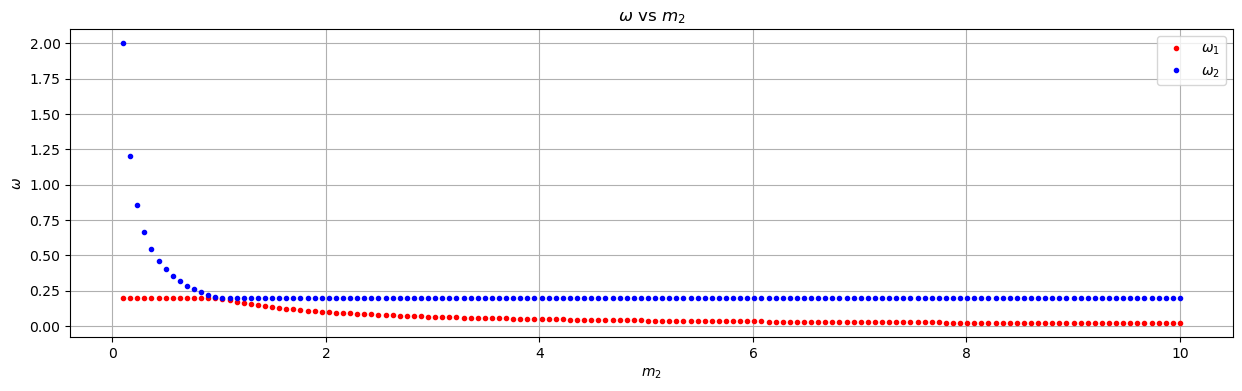

In [78]:
k = 0.2  # Constante da mola
m1 = 1.0  # Massa m1 fixa
m2_values = np.linspace(0.1, 10, 150)  # Varia m2

w_var = []

for m2 in m2_values:
    D = np.array([[k/m1, -0],
                   [0, k/m2]])
    ww, v = eigh(D)
    #eigvals = np.linalg.eigvals(D)
    w_var.append(ww)

w_var = np.array(w_var)

plt.figure(figsize=(15, 4))
plt.plot(m2_values, w_var[:, 0], label="$\omega_1$", marker = '.', linestyle = 'none', color='r')
plt.plot(m2_values, w_var[:, 1], label="$\omega_2$", marker = '.', linestyle = 'none', color='b')
plt.xlabel("$m_2$")
plt.ylabel("$\omega$")
plt.legend()
plt.title("$\omega$ vs $m_2$")
plt.grid()
plt.show()

### D para n = 3

In [88]:
k, m1, m2, m3 = 0.1, 1, 1, 1 #constantes genéricas


D3 = np.array([[k/m1, -k/m1, 0],
               [-k/m2, 2*k/m2, -k/m2],
               [0, -k/m3, k/m3]])
valor, vetor = eigh(D3)
print(f"Matriz D: \n{D3} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

Matriz D: 
[[ 0.1 -0.1  0. ]
 [-0.1  0.2 -0.1]
 [ 0.  -0.1  0.1]] 
 
Frequências: [2.22044605e-16 1.00000000e-01 3.00000000e-01] 
 
Modos normais: 
[[ 5.77350269e-01 -7.07106781e-01 -4.08248290e-01]
 [ 5.77350269e-01  1.37383090e-15  8.16496581e-01]
 [ 5.77350269e-01  7.07106781e-01 -4.08248290e-01]]


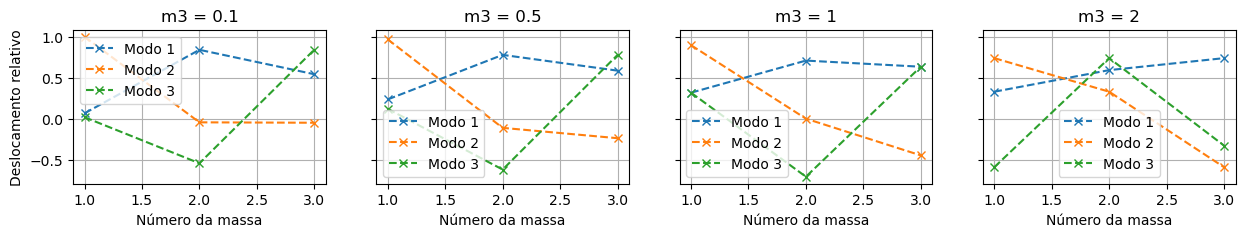

In [97]:
k, m1 = 0.1, 1 
m2 = 2
m3_var = [0.1, 0.5, 1, 2]

fig, axs = plt.subplots(1, len(m3_var), figsize=(15, 2), sharey=True)

for idx, m3 in enumerate(m3_var):
    D3 = np.array([[k/m1, -k/m1, 0],
               [-k/m2, 2*k/m2, -k/m2],
               [0, -k/m3, k/m3]])
    valor, vetor = eigh(D3)
    
    for i in range(vetor.shape[1]):
        axs[idx].plot(range(1, vetor.shape[0]+1), vetor[:, i], 'x--', label=f'Modo {i+1}')
    axs[idx].set_title(f"m3 = {m3}")
    axs[idx].set_xlabel('Número da massa')
    axs[idx].grid(True)
    if idx == 0:
        axs[idx].set_ylabel('Deslocamento relativo')
    axs[idx].legend()

<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_9464/3315628043.py:14: SyntaxWarning: invalid escape sequence '\o'
  axs[idx].plot(i+1, freq, 'o', color=f'C{i}', label=f'$\omega${i+1} = {freq:.2f}')
/tmp/ipykernel_9464/3315628043.py:19: SyntaxWarning: invalid escape sequence '\o'
  axs[idx].set_ylabel('$\omega$ (rad/s)')
/tmp/ipykernel_9464/3315628043.py:11: RuntimeWarning: invalid value encountered in sqrt
  freqs = np.sqrt(valor)


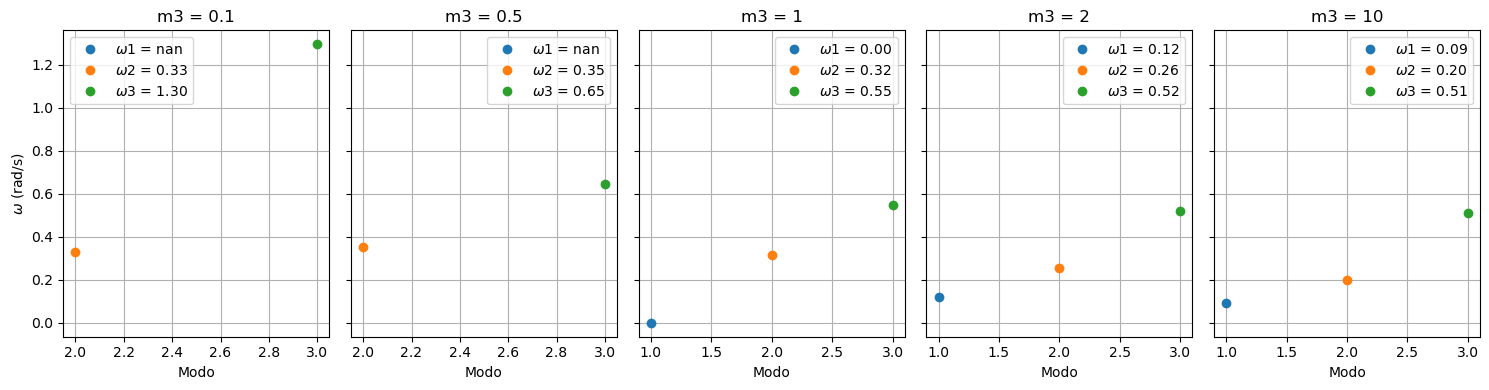

[0.0936729  0.19782519 0.51194783]


In [103]:
k, m1, m2 = 0.1, 1, 1
m3_var = [0.1, 0.5, 1, 2, 10]

fig, axs = plt.subplots(1, len(m3_var), figsize=(15, 4), sharey=True)

for idx, m3 in enumerate(m3_var):
    D3 = np.array([[k/m1, -k/m1, 0],
               [-k/m2, 2*k/m2, -k/m2],
               [0, -k/m3, k/m3]])
    valor, vetor = eigh(D3)
    freqs = np.sqrt(valor)

    for i, freq in enumerate(freqs):
        axs[idx].plot(i+1, freq, 'o', color=f'C{i}', label=f'$\omega${i+1} = {freq:.2f}')
    axs[idx].set_title(f"m3 = {m3}")
    axs[idx].set_xlabel('Modo')
    axs[idx].grid(True)
    if idx == 0:
        axs[idx].set_ylabel('$\omega$ (rad/s)')
    axs[idx].legend() 

plt.tight_layout()
plt.show()
print(freqs)

In [84]:
massas = int(input("Qual o número de massas da cadeia? "))
m_var = float(input("Qual a massa m? "))
m = np.full(massas, m_var)  # Cria um array 1D com todas as massas iguais a m_var

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D corretamente
D = np.zeros((massas, massas))

# Preenche a matriz D (forma simétrica)
for i in range(massas):
    if massas == 1:
        D[i, i] = k1 / m[i]
    else:
        if i == 0:
            D[i, i] = k1 / m[i]
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  # Garante simetria
        elif i == massas - 1:
            D[i, i] = k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  # Garante simetria
        else:
            D[i, i] = 2 * k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  # Termo simétrico
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  # Termo simétrico

# Usa eigh para matrizes simétricas (mais estável)
autovalores, autovetores = eigh(D)  
#frequencias = np.sqrt(np.abs(autovalores))  # Autovalores devem ser >= 0

#print(D)
print(f"Autovalores: {autovalores}")
#print(f"Frequências: {frequencias}")
print(f"Autovetores:\n{autovetores}")

Autovalores: [0.         0.0097887  0.0381966  0.08244295 0.1381966  0.2
 0.2618034  0.31755705 0.3618034  0.3902113 ]
Autovetores:
[[ 3.16227766e-01  4.41707654e-01 -4.25325404e-01  3.98470231e-01
  -3.61803399e-01  3.16227766e-01  2.62865556e-01  2.03030724e-01
   1.38196601e-01 -6.99596196e-02]
 [ 3.16227766e-01  3.98470231e-01 -2.62865556e-01  6.99596196e-02
   1.38196601e-01 -3.16227766e-01 -4.25325404e-01 -4.41707654e-01
  -3.61803399e-01  2.03030724e-01]
 [ 3.16227766e-01  3.16227766e-01  4.37759089e-16 -3.16227766e-01
   4.47213595e-01 -3.16227766e-01 -2.24297877e-15  3.16227766e-01
   4.47213595e-01 -3.16227766e-01]
 [ 3.16227766e-01  2.03030724e-01  2.62865556e-01 -4.41707654e-01
   1.38196601e-01  3.16227766e-01  4.25325404e-01  6.99596196e-02
  -3.61803399e-01  3.98470231e-01]
 [ 3.16227766e-01  6.99596196e-02  4.25325404e-01 -2.03030724e-01
  -3.61803399e-01  3.16227766e-01 -2.62865556e-01 -3.98470231e-01
   1.38196601e-01 -4.41707654e-01]
 [ 3.16227766e-01 -6.99596196e-02

### Para n = 4

In [ ]:
k, m1, m2, m3, m4 = 1, 1, 1, 1, 1 


D4 = np.array([[k/m1, -k/m1,    0,      0],
               [-k/m2, 2*k/m2, -k/m2,   0],
               [0,    -k/m3,    2*k/m3, 0],
               [0,      0,     -k/m4,  k/m4]])
valor, vetor = eigh(D4)
print(f"Matriz D: \n{D4} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

Matriz D: 
[[ 1. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0. -1.  1.]] 
 
Frequências: [-9.74614466e-17  5.85786438e-01  2.00000000e+00  3.41421356e+00] 
 
Modos normais: 
[[-0.5         0.65328148  0.5        -0.27059805]
 [-0.5         0.27059805 -0.5         0.65328148]
 [-0.5        -0.27059805 -0.5        -0.65328148]
 [-0.5        -0.65328148  0.5         0.27059805]]


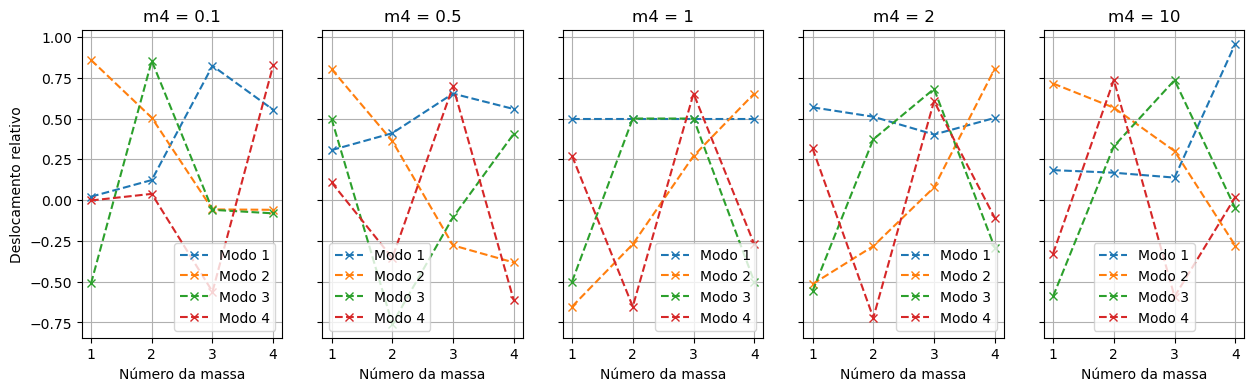

In [118]:
k, m1, m2, m3, = 0.1, 1, 1, 1
m4_var = [0.1, 0.5, 1, 2, 10]

fig, axs = plt.subplots(1, len(m4_var), figsize=(15, 4), sharey=True)
for idx, m4 in enumerate(m4_var):
    D4 = np.array([[k/m1, -k/m1,    0,      0],
               [-k/m2, 2*k/m2, -k/m2,   0],
               [0,    -k/m3,    2*k/m3, 0],
               [0,      0,     -k/m4,  k/m4]])
    valor, vetor = eigh(D4)
    #freqs = np.sqrt(valor)
    
    for i in range(vetor.shape[1]):
        axs[idx].plot(range(1, vetor.shape[0]+1), vetor[:, i], 'x--', label=f'Modo {i+1}')
    axs[idx].set_title(f"m4 = {m4}")
    axs[idx].set_xlabel('Número da massa')
    axs[idx].grid(True)
    if idx == 0:
        axs[idx].set_ylabel('Deslocamento relativo')
    axs[idx].legend()

<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_9464/4123855592.py:15: SyntaxWarning: invalid escape sequence '\o'
  axs[idx].plot(i+1, freq, 'o', color=f'C{i}', label=f'$\omega${i+1} = {freq:.2f}')
/tmp/ipykernel_9464/4123855592.py:20: SyntaxWarning: invalid escape sequence '\o'
  axs[idx].set_ylabel('$\omega$ (rad/s)')
/tmp/ipykernel_9464/4123855592.py:12: RuntimeWarning: invalid value encountered in sqrt
  freqs = np.sqrt(valor)


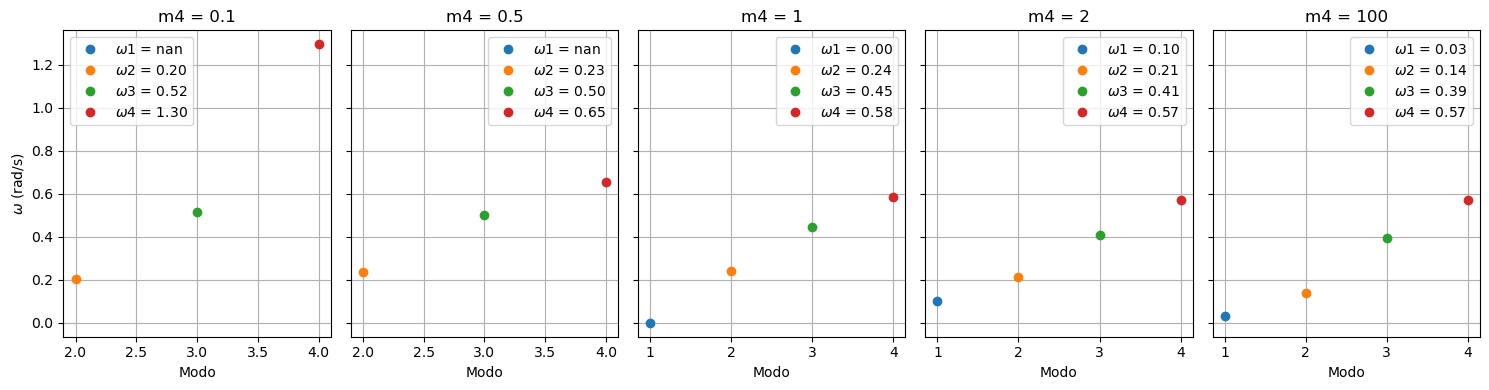

[0.03145932 0.1407549  0.39433403 0.56982369]


In [123]:
k, m1, m2, m3 = 0.1, 1, 1, 1
m4_var = [0.1, 0.5, 1, 2, 100]

fig, axs = plt.subplots(1, len(m4_var), figsize=(15, 4), sharey=True)

for idx, m4 in enumerate(m4_var):
    D4 = np.array([[k/m1, -k/m1,    0,      0],
               [-k/m2, 2*k/m2, -k/m2,   0],
               [0,    -k/m3,    2*k/m3, 0],
               [0,      0,     -k/m4,  k/m4]])
    valor, vetor = eigh(D4)
    freqs = np.sqrt(valor)

    for i, freq in enumerate(freqs):
        axs[idx].plot(i+1, freq, 'o', color=f'C{i}', label=f'$\omega${i+1} = {freq:.2f}')
    axs[idx].set_title(f"m4 = {m4}")
    axs[idx].set_xlabel('Modo')
    axs[idx].grid(True)
    if idx == 0:
        axs[idx].set_ylabel('$\omega$ (rad/s)')
    axs[idx].legend() 

plt.tight_layout()
plt.show()
print(freqs)

### Para n = 4 considerando $2^a$ vizinhança

In [ ]:
k1, k2, m1, m2, m3, m4 = 1, 1, 1, 1, 1, 1 #constantes genéricas


D4_v = np.array([[(k1 + k2)/m1, -k1/m1,    -k2,      0],
               [-k/m2, (2*k1 + k2)/m2, -k1/m2,   -k2/m2],
               [-k2,    -k/m3,    (2*k1 + k2)/m3, -k1/m3],
               [0,      -k2/m4,     -k1/m4,  (k1 + k2)/m4]])
valor, vetor = eigh(D4_v)
print(f"Matriz D: \n{D4_v} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

Matriz D: 
[[ 2. -1. -1.  0.]
 [-1.  3. -1. -1.]
 [-1. -1.  3. -1.]
 [ 0. -1. -1.  2.]] 
 
Frequências: [-9.64506253e-16  2.00000000e+00  4.00000000e+00  4.00000000e+00] 
 
Modos normais: 
[[-5.00000000e-01  7.07106781e-01  4.97655806e-01 -4.83600990e-02]
 [-5.00000000e-01 -2.91659768e-17 -5.66047314e-01 -6.55431491e-01]
 [-5.00000000e-01  3.58693823e-17 -4.29264298e-01  7.52151689e-01]
 [-5.00000000e-01 -7.07106781e-01  4.97655806e-01 -4.83600990e-02]]


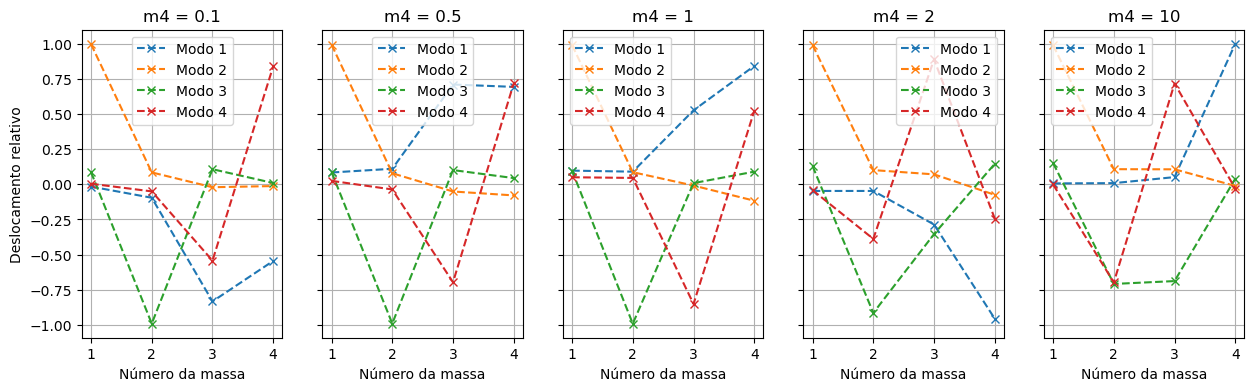

In [120]:
k1, k2, m1, m2, m3, = 1, 0.1, 1, 1, 1
m4_var = [0.1, 0.5, 1, 2, 10]

fig, axs = plt.subplots(1, len(m4_var), figsize=(15, 4), sharey=True)
for idx, m4 in enumerate(m4_var):
    D4_v = np.array([[(k1 + k2)/m1, -k1/m1,    -k2,      0],
               [-k/m2, (2*k1 + k2)/m2, -k1/m2,   -k2/m2],
               [-k2,    -k/m3,    (2*k1 + k2)/m3, -k1/m3],
               [0,      -k2/m4,     -k1/m4,  (k1 + k2)/m4]])
    valor, vetor = eigh(D4_v)
    #freqs = np.sqrt(valor)
    
    for i in range(vetor.shape[1]):
        axs[idx].plot(range(1, vetor.shape[0]+1), vetor[:, i], 'x--', label=f'Modo {i+1}')
    axs[idx].set_title(f"m4 = {m4}")
    axs[idx].set_xlabel('Número da massa')
    axs[idx].grid(True)
    if idx == 0:
        axs[idx].set_ylabel('Deslocamento relativo')
    axs[idx].legend()

<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
<>:14: SyntaxWarning: invalid escape sequence '\o'
<>:19: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_9464/3750302230.py:14: SyntaxWarning: invalid escape sequence '\o'
  axs[idx].plot(i+1, freq, 'o', color=f'C{i}', label=f'$\omega${i+1} = {freq:.2f}')
/tmp/ipykernel_9464/3750302230.py:19: SyntaxWarning: invalid escape sequence '\o'
  axs[idx].set_ylabel('$\omega$ (rad/s)')
/tmp/ipykernel_9464/3750302230.py:11: RuntimeWarning: invalid value encountered in sqrt
  freqs = np.sqrt(valor)


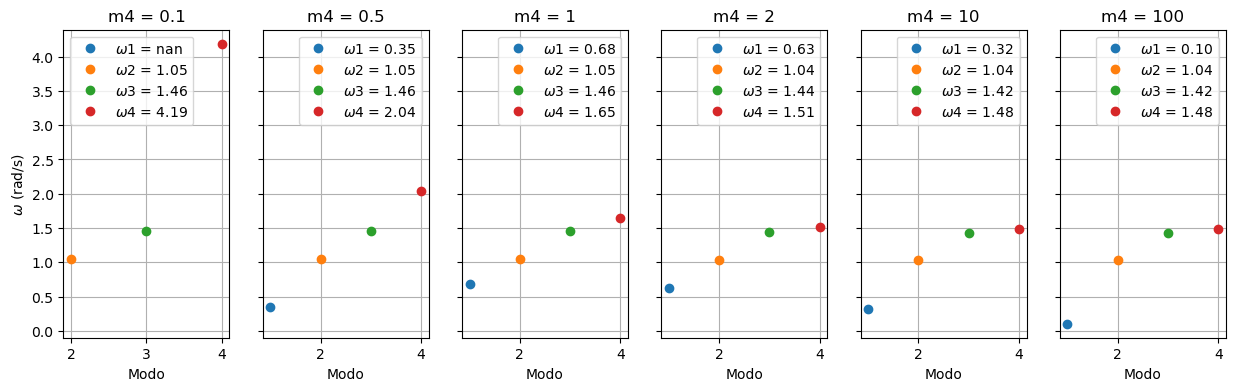

In [125]:
k1, k2, m1, m2, m3, = 1, 0.1, 1, 1, 1
m4_var = [0.1, 0.5, 1, 2, 10, 100]

fig, axs = plt.subplots(1, len(m4_var), figsize=(15, 4), sharey=True)
for idx, m4 in enumerate(m4_var):
    D4_v = np.array([[(k1 + k2)/m1, -k1/m1,    -k2,      0],
               [-k/m2, (2*k1 + k2)/m2, -k1/m2,   -k2/m2],
               [-k2,    -k/m3,    (2*k1 + k2)/m3, -k1/m3],
               [0,      -k2/m4,     -k1/m4,  (k1 + k2)/m4]])
    valor, vetor = eigh(D4_v)
    freqs = np.sqrt(valor)
    
    for i, freq in enumerate(freqs):
        axs[idx].plot(i+1, freq, 'o', color=f'C{i}', label=f'$\omega${i+1} = {freq:.2f}')
    axs[idx].set_title(f"m4 = {m4}")
    axs[idx].set_xlabel('Modo')
    axs[idx].grid(True)
    if idx == 0:
        axs[idx].set_ylabel('$\omega$ (rad/s)')
    axs[idx].legend()
    

## Caso generalizado: matriz $D (n \times n)$

#### Cria a matriz D

In [ ]:
# Cria a matriz nula
massas = int(input("Qual o número de massas da cadeia? "))
m = []
for i in range(int(massas)): 
    m_var = input(f"Qual a massa m{i+1}? ")
    m.append(float(m_var))
m = np.array(m)

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D com zeros
D = np.zeros((massas, massas))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(massas):
    if massas == 1:  # Caso especial com apenas 1 massa
        D[i, i] = k1/m[i]
    else:
        if i == 0:  # Primeira massa
            D[i, i] = k1/m[i]
            D[i, i+1] = -k1/m[i]
        elif i == massas-1:  # Última massa
            D[i, i] = k1/m[i]
            D[i, i-1] = -k1/m[i]
        else:  # Massas do meio
            D[i, i] = 2*k1/m[i]
            D[i, i-1] = -k1/m[i]
            D[i, i+1] = -k1/m[i]

print("Matriz D:")
print(D)

Matriz D:
[[ 0.1 -0.1  0.   0.   0. ]
 [-0.1  0.2 -0.1  0.   0. ]
 [ 0.  -0.1  0.2 -0.1  0. ]
 [ 0.   0.  -0.1  0.2 -0.1]
 [ 0.   0.   0.  -0.1  0.1]]


#### modos e frequências para n arbitrário e massas iguais

In [ ]:
massas = int(input("Qual o número de massas da cadeia? "))
m_var = float(input("Qual a massa m? "))
m = np.full(massas, m_var)  # Cria um array 1D com todas as massas iguais a m_var

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D corretamente
D = np.zeros((massas, massas))

# Preenche a matriz D (forma simétrica)
for i in range(massas):
    if massas == 1:
        D[i, i] = k1 / m[i]
    else:
        if i == 0:
            D[i, i] = k1 / m[i]
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  
            D[i, i] = k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  
        else:
            D[i, i] = 2 * k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  

# Usa eigh para matrizes simétricas (mais estável)
autovalores, autovetores = eigh(D)  
freq = np.sqrt(autovalores)

# tava gerando o primeiro modo negativo, deveria ser posito, isso corrige
for i in range(autovetores.shape[1]):
    if autovetores[0, i] < 0:
        autovetores[:, i] *= -1

#print(D)
#print(f"Autovalores: {autovalores}")
#print(f"Frequências: {freq}")
#print(f"Autovetores:\n{autovetores}")

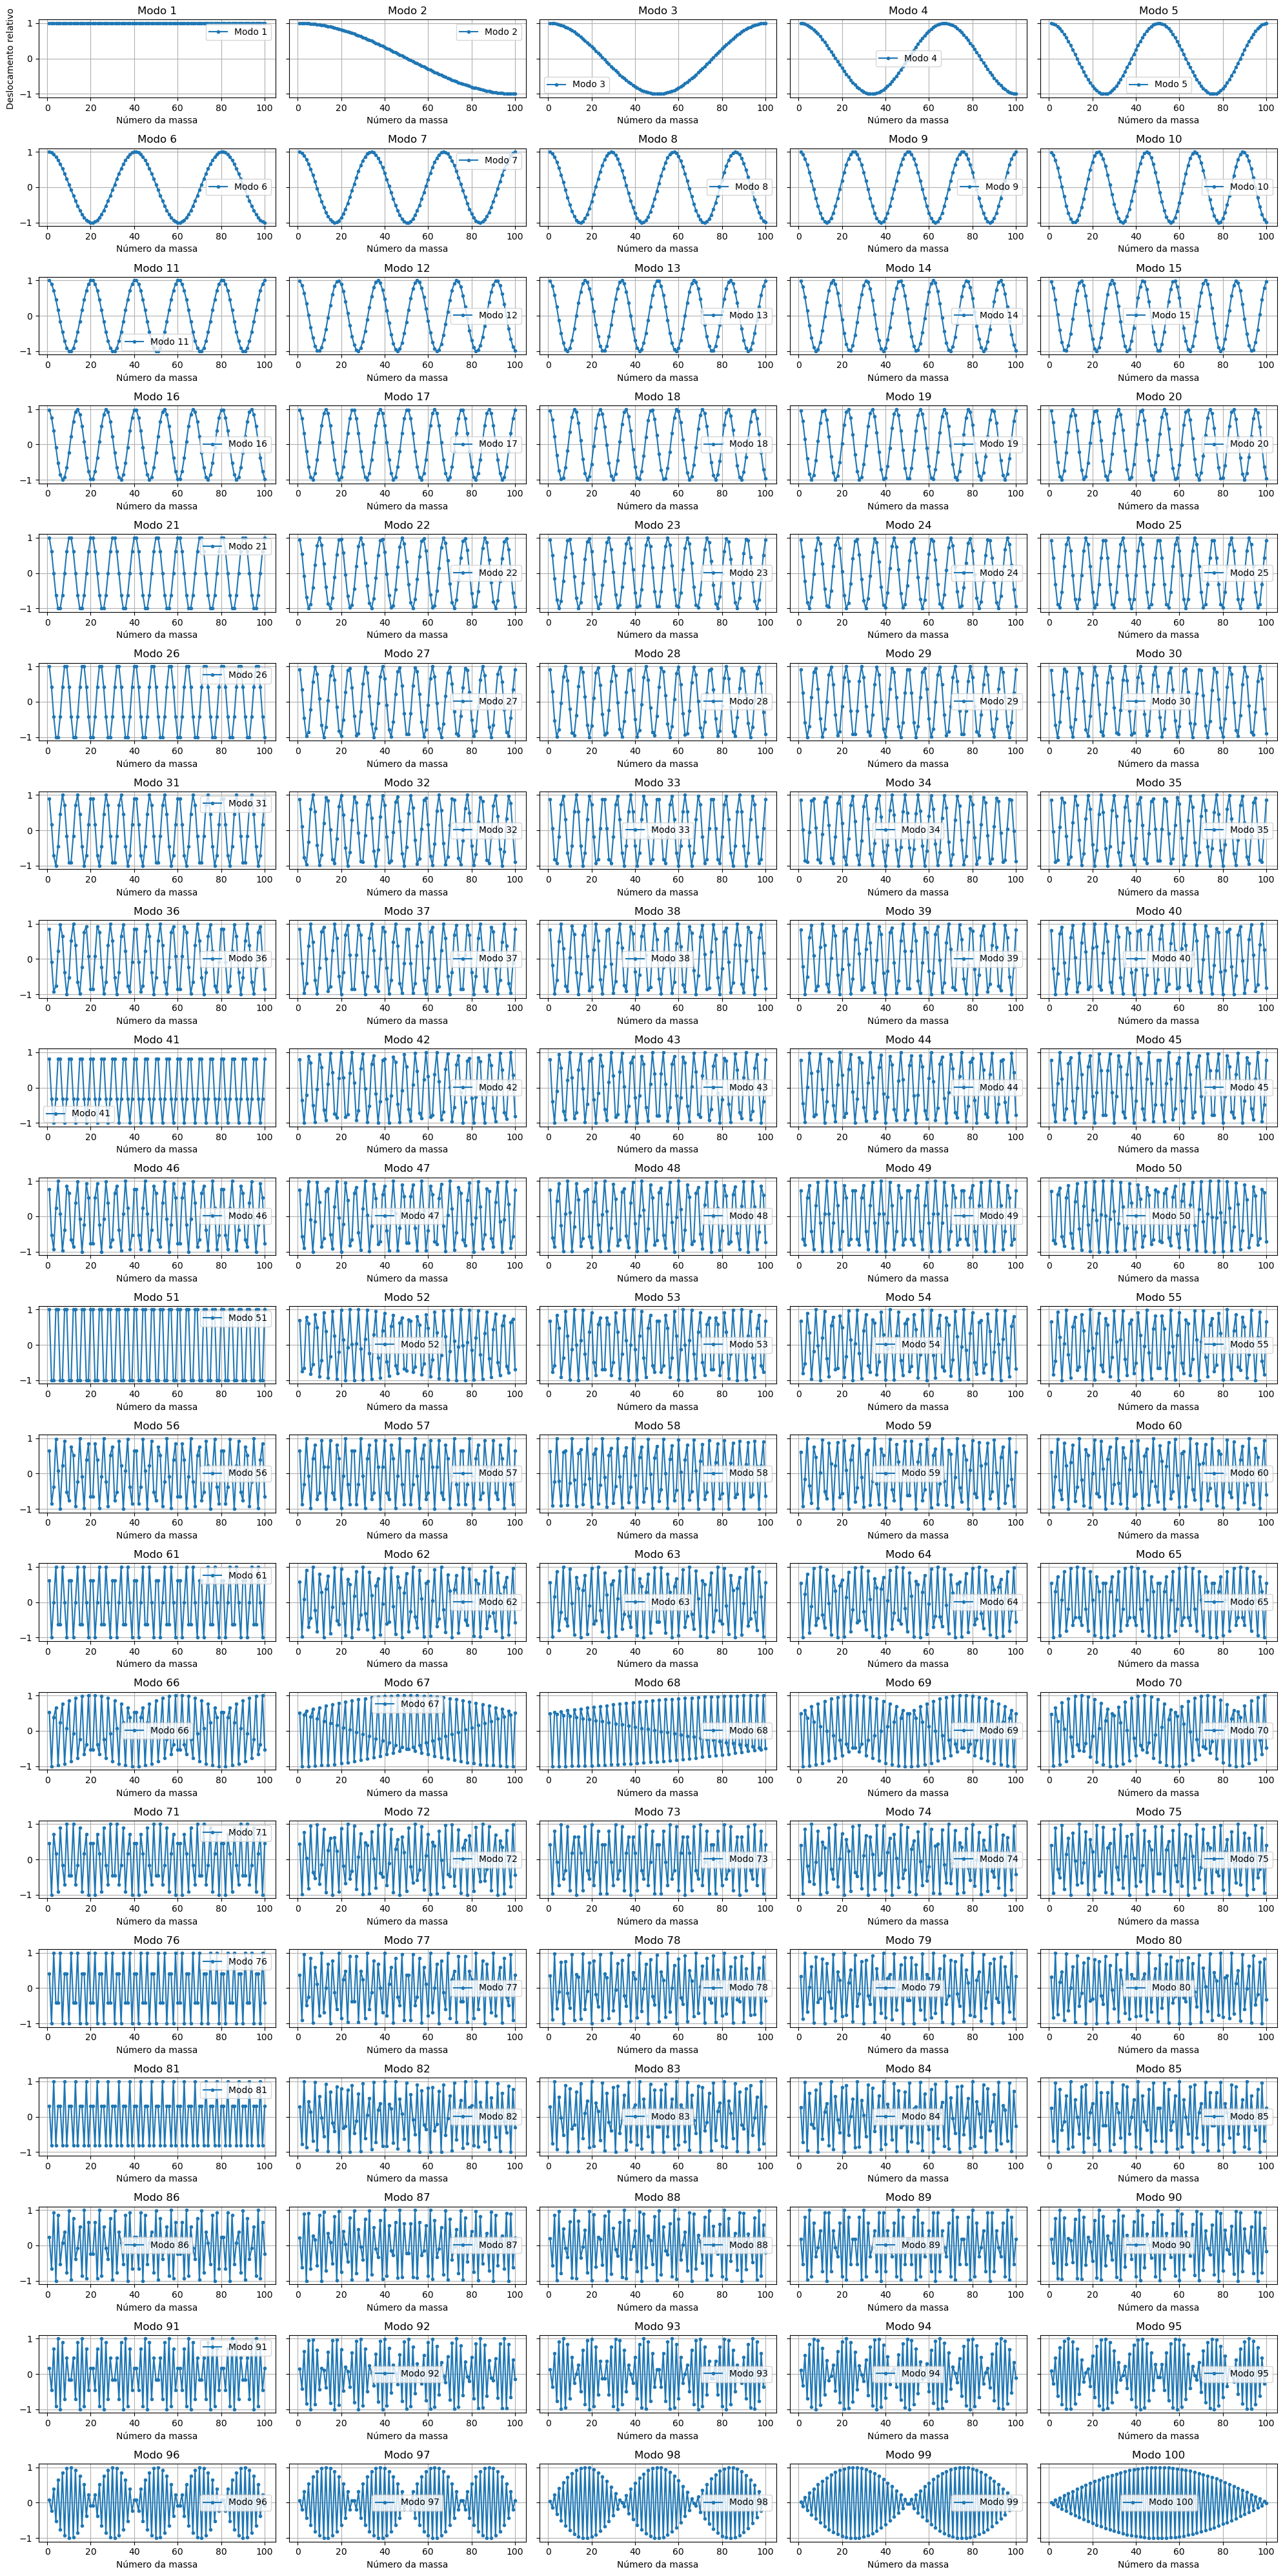

In [113]:


# Normalização dos autovetores
modos_normalizados = autovetores / np.max(np.abs(autovetores), axis=0) # serve para deixar tudo com a mesma amplitude na hora de plotar

n_cols = int(np.ceil((np.sqrt(massas))/2))  
n_rows = int(np.ceil((massas) / n_cols))

# Criar figura com subplots individuais
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 2*n_rows), sharey=True)  # 1 linha, N colunas
axs = np.array(axs).reshape(-1)
 

#Acos(wt)
#t = np.linspace(0, 2 * np.pi, massas)
#l = 1/2

# Plotar cada modo em um subplot separado
for i in range(massas):
    l +=1
    axs[i].plot(range(1, massas + 1), modos_normalizados[:, i], '.-', label=f'Modo {i + 1}')
    #axs[i].plot(np.cos(l*np.sqrt(autovalores[i])*t*np.pi) , label='Acos(wt)', linestyle='--', color='gray')
    axs[i].set_title(f'Modo {i + 1}')
    axs[i].set_xlabel('Número da massa')
    axs[i].grid(True)
    axs[i].legend()

axs[0].set_ylabel('Deslocamento relativo')

plt.tight_layout()  # Ajusta espaçamento entre subplots
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_9464/373116425.py:5: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$\omega$')


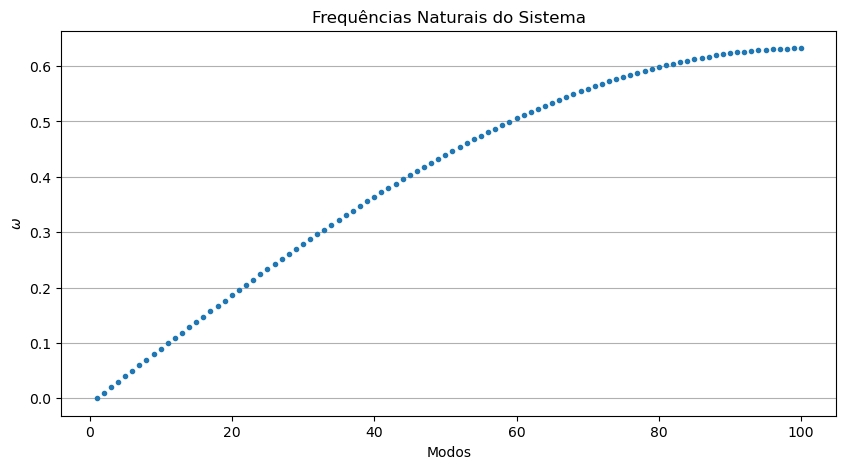

In [111]:
frequencias = np.sqrt(autovalores)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(frequencias)+1), frequencias, '.')
plt.xlabel('Modos')
plt.ylabel('$\omega$')
plt.title('Frequências Naturais do Sistema')
plt.grid(True, axis='y')
plt.show()